# Seoul Bike Demand Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('weatherbike.csv', encoding="unicode_escape")
df.shape

(8760, 14)

In [3]:
df.head()

Date  Hour  Rented Bike Count  temp  dew  humidity  precip  snow  \
0  2023-01-01     0               1544   0.9 -3.5     72.34     0.0   0.0   
1  2023-01-01     1               1642   1.4 -3.2     71.22     0.0   0.0   
2  2023-01-01     2               1118   1.5 -3.0     72.07     0.0   0.0   
3  2023-01-01     3                811   1.7 -2.6     73.32     0.0   0.0   
4  2023-01-01     4                639   1.5 -2.7     73.60     0.0   0.0   

   snowdepth  windspeed  visibility  solarradiation  uvindex Weekday  
0        2.4        5.2        14.8               0        0      No  
1        2.4        6.8        10.9               0        0      No  
2        2.4        6.8         9.0               0        0      No  
3        2.4        5.6         8.1               0        0      No  
4        2.4        5.1         7.2               0        0      No

In [4]:
df.tail()

Date  Hour  Rented Bike Count  temp  dew  humidity  precip  snow  \
8755  2023-12-31    19               1912   2.6  1.1     89.80     0.0   0.0   
8756  2023-12-31    20               1665   1.8  1.0     94.35     0.0   0.0   
8757  2023-12-31    21               1616   1.6  1.1     96.39     0.0   0.0   
8758  2023-12-31    22               1456   1.3  0.5     94.40     0.0   0.0   
8759  2023-12-31    23               1223   0.8  0.3     96.43     0.0   0.0   

      snowdepth  windspeed  visibility  solarradiation  uvindex Weekday  
8755       1.99        3.6        14.1               0        0      No  
8756       1.99        7.4         7.1               0        0      No  
8757       0.30        8.8         5.1               0        0      No  
8758       1.99        1.8         4.1               0        0      No  
8759       1.99        3.6         7.0               0        0      No

In [5]:
# Conversion function:- Converting windspeed from miles/hr to m/sec
def mph_to_ms(mph):
    return mph * 0.44704

# Apply the conversion to the 'windspeed' column and overwrite it
df['windspeed'] = df['windspeed'].apply(mph_to_ms)

In [6]:
# Print the first few rows to verify the conversion
print(df[['windspeed']].head(10))

   windspeed
0   2.324608
1   3.039872
2   3.039872
3   2.503424
4   2.279904
5   4.068064
6   4.604512
7   3.799840
8   4.202176
9   3.129280


In [7]:
# Conversion function
def miles_to_10m(miles):
    return miles * 160.934

# Apply the conversion to the 'visibility' column
df['visibility'] = df['visibility'].apply(miles_to_10m)

In [8]:
print(df[['visibility']].head(10))

   visibility
0   2381.8232
1   1754.1806
2   1448.4060
3   1303.5654
4   1158.7248
5   1866.8344
6   1593.2466
7   1464.4994
8   1287.4720
9   1303.5654


In [9]:
# Conversion function
def w_per_m2_to_mj_per_m2(w_per_m2):
    return w_per_m2 * 0.0036
df['solarradiation'] = df['solarradiation'].apply(w_per_m2_to_mj_per_m2)

In [10]:
print(df[['solarradiation']].head(10))

   solarradiation
0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.0000
5          0.0000
6          0.0000
7          0.0000
8          0.0036
9          0.2592


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Hour               8760 non-null   int64  
 2   Rented Bike Count  8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   dew                8760 non-null   float64
 5   humidity           8760 non-null   float64
 6   precip             8760 non-null   float64
 7   snow               8760 non-null   float64
 8   snowdepth          8760 non-null   float64
 9   windspeed          8760 non-null   float64
 10  visibility         8760 non-null   float64
 11  solarradiation     8760 non-null   float64
 12  uvindex            8760 non-null   int64  
 13  Weekday            8760 non-null   object 
dtypes: float64(9), int64(3), object(2)
memory usage: 958.3+ KB


In [12]:
df.describe(include="all").T

count unique         top  freq         mean          std  \
Date                 8760    365  2023-01-01    24          NaN          NaN   
Hour               8760.0    NaN         NaN   NaN         11.5     6.922582   
Rented Bike Count  8760.0    NaN         NaN   NaN  4985.763813  4152.946856   
temp               8760.0    NaN         NaN   NaN    22.107329    23.129708   
dew                8760.0    NaN         NaN   NaN    14.480468    22.409592   
humidity           8760.0    NaN         NaN   NaN    66.206955    19.168079   
precip             8760.0    NaN         NaN   NaN     0.057081     0.794132   
snow               8760.0    NaN         NaN   NaN     0.000993     0.024833   
snowdepth          8760.0    NaN         NaN   NaN     0.132063     1.370927   
windspeed          8760.0    NaN         NaN   NaN       3.3931     1.821656   
visibility         8760.0    NaN         NaN   NaN  2670.565618  1294.581006   
solarradiation     8760.0    NaN         NaN   NaN     0.652707     0.967539   
uvindex            8760.0    NaN         NaN   NaN     1.799658     2.699329   
Weekday              8760      2         Yes  6240          NaN          NaN   

                     min        25%        50%        75%        max  
Date                 NaN        NaN        NaN        NaN        NaN  
Hour                 0.0       5.75       11.5      17.25       23.0  
Rented Bike Count    1.0     1536.0     4132.5     7217.0    23210.0  
temp               -17.1        5.2       18.2       27.3       90.6  
dew                -26.4     -2.325       10.3       22.9       76.1  
humidity           14.57    52.5075      67.45      81.57      100.0  
precip               0.0        0.0        0.0        0.0     36.696  
snow                 0.0        0.0        0.0        0.0        1.1  
snowdepth            0.0        0.0        0.0        0.0      100.0  
windspeed            0.0   2.101088    3.12928   4.425696  14.662912  
visibility           0.0  1899.0212  3025.5592  3154.3064     8046.7  
solarradiation       0.0        0.0      0.018     1.1853     3.5784  
uvindex              0.0        0.0        0.0        3.0       10.0  
Weekday              NaN        NaN        NaN        NaN        NaN

In [13]:
df.isnull().sum()

Date                 0
Hour                 0
Rented Bike Count    0
temp                 0
dew                  0
humidity             0
precip               0
snow                 0
snowdepth            0
windspeed            0
visibility           0
solarradiation       0
uvindex              0
Weekday              0
dtype: int64

In [14]:
df["Date"] = pd.to_datetime(df["Date"])

df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.drop("Date", axis=1, inplace=True)


In [15]:
df.head()

Hour  Rented Bike Count  temp  dew  humidity  precip  snow  snowdepth  \
0     0               1544   0.9 -3.5     72.34     0.0   0.0        2.4   
1     1               1642   1.4 -3.2     71.22     0.0   0.0        2.4   
2     2               1118   1.5 -3.0     72.07     0.0   0.0        2.4   
3     3                811   1.7 -2.6     73.32     0.0   0.0        2.4   
4     4                639   1.5 -2.7     73.60     0.0   0.0        2.4   

   windspeed  visibility  solarradiation  uvindex Weekday weekday  Day  Month  \
0   2.324608   2381.8232             0.0        0      No  Sunday    1      1   
1   3.039872   1754.1806             0.0        0      No  Sunday    1      1   
2   3.039872   1448.4060             0.0        0      No  Sunday    1      1   
3   2.503424   1303.5654             0.0        0      No  Sunday    1      1   
4   2.279904   1158.7248             0.0        0      No  Sunday    1      1   

   Year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023

## EDA

/Users/tusharsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


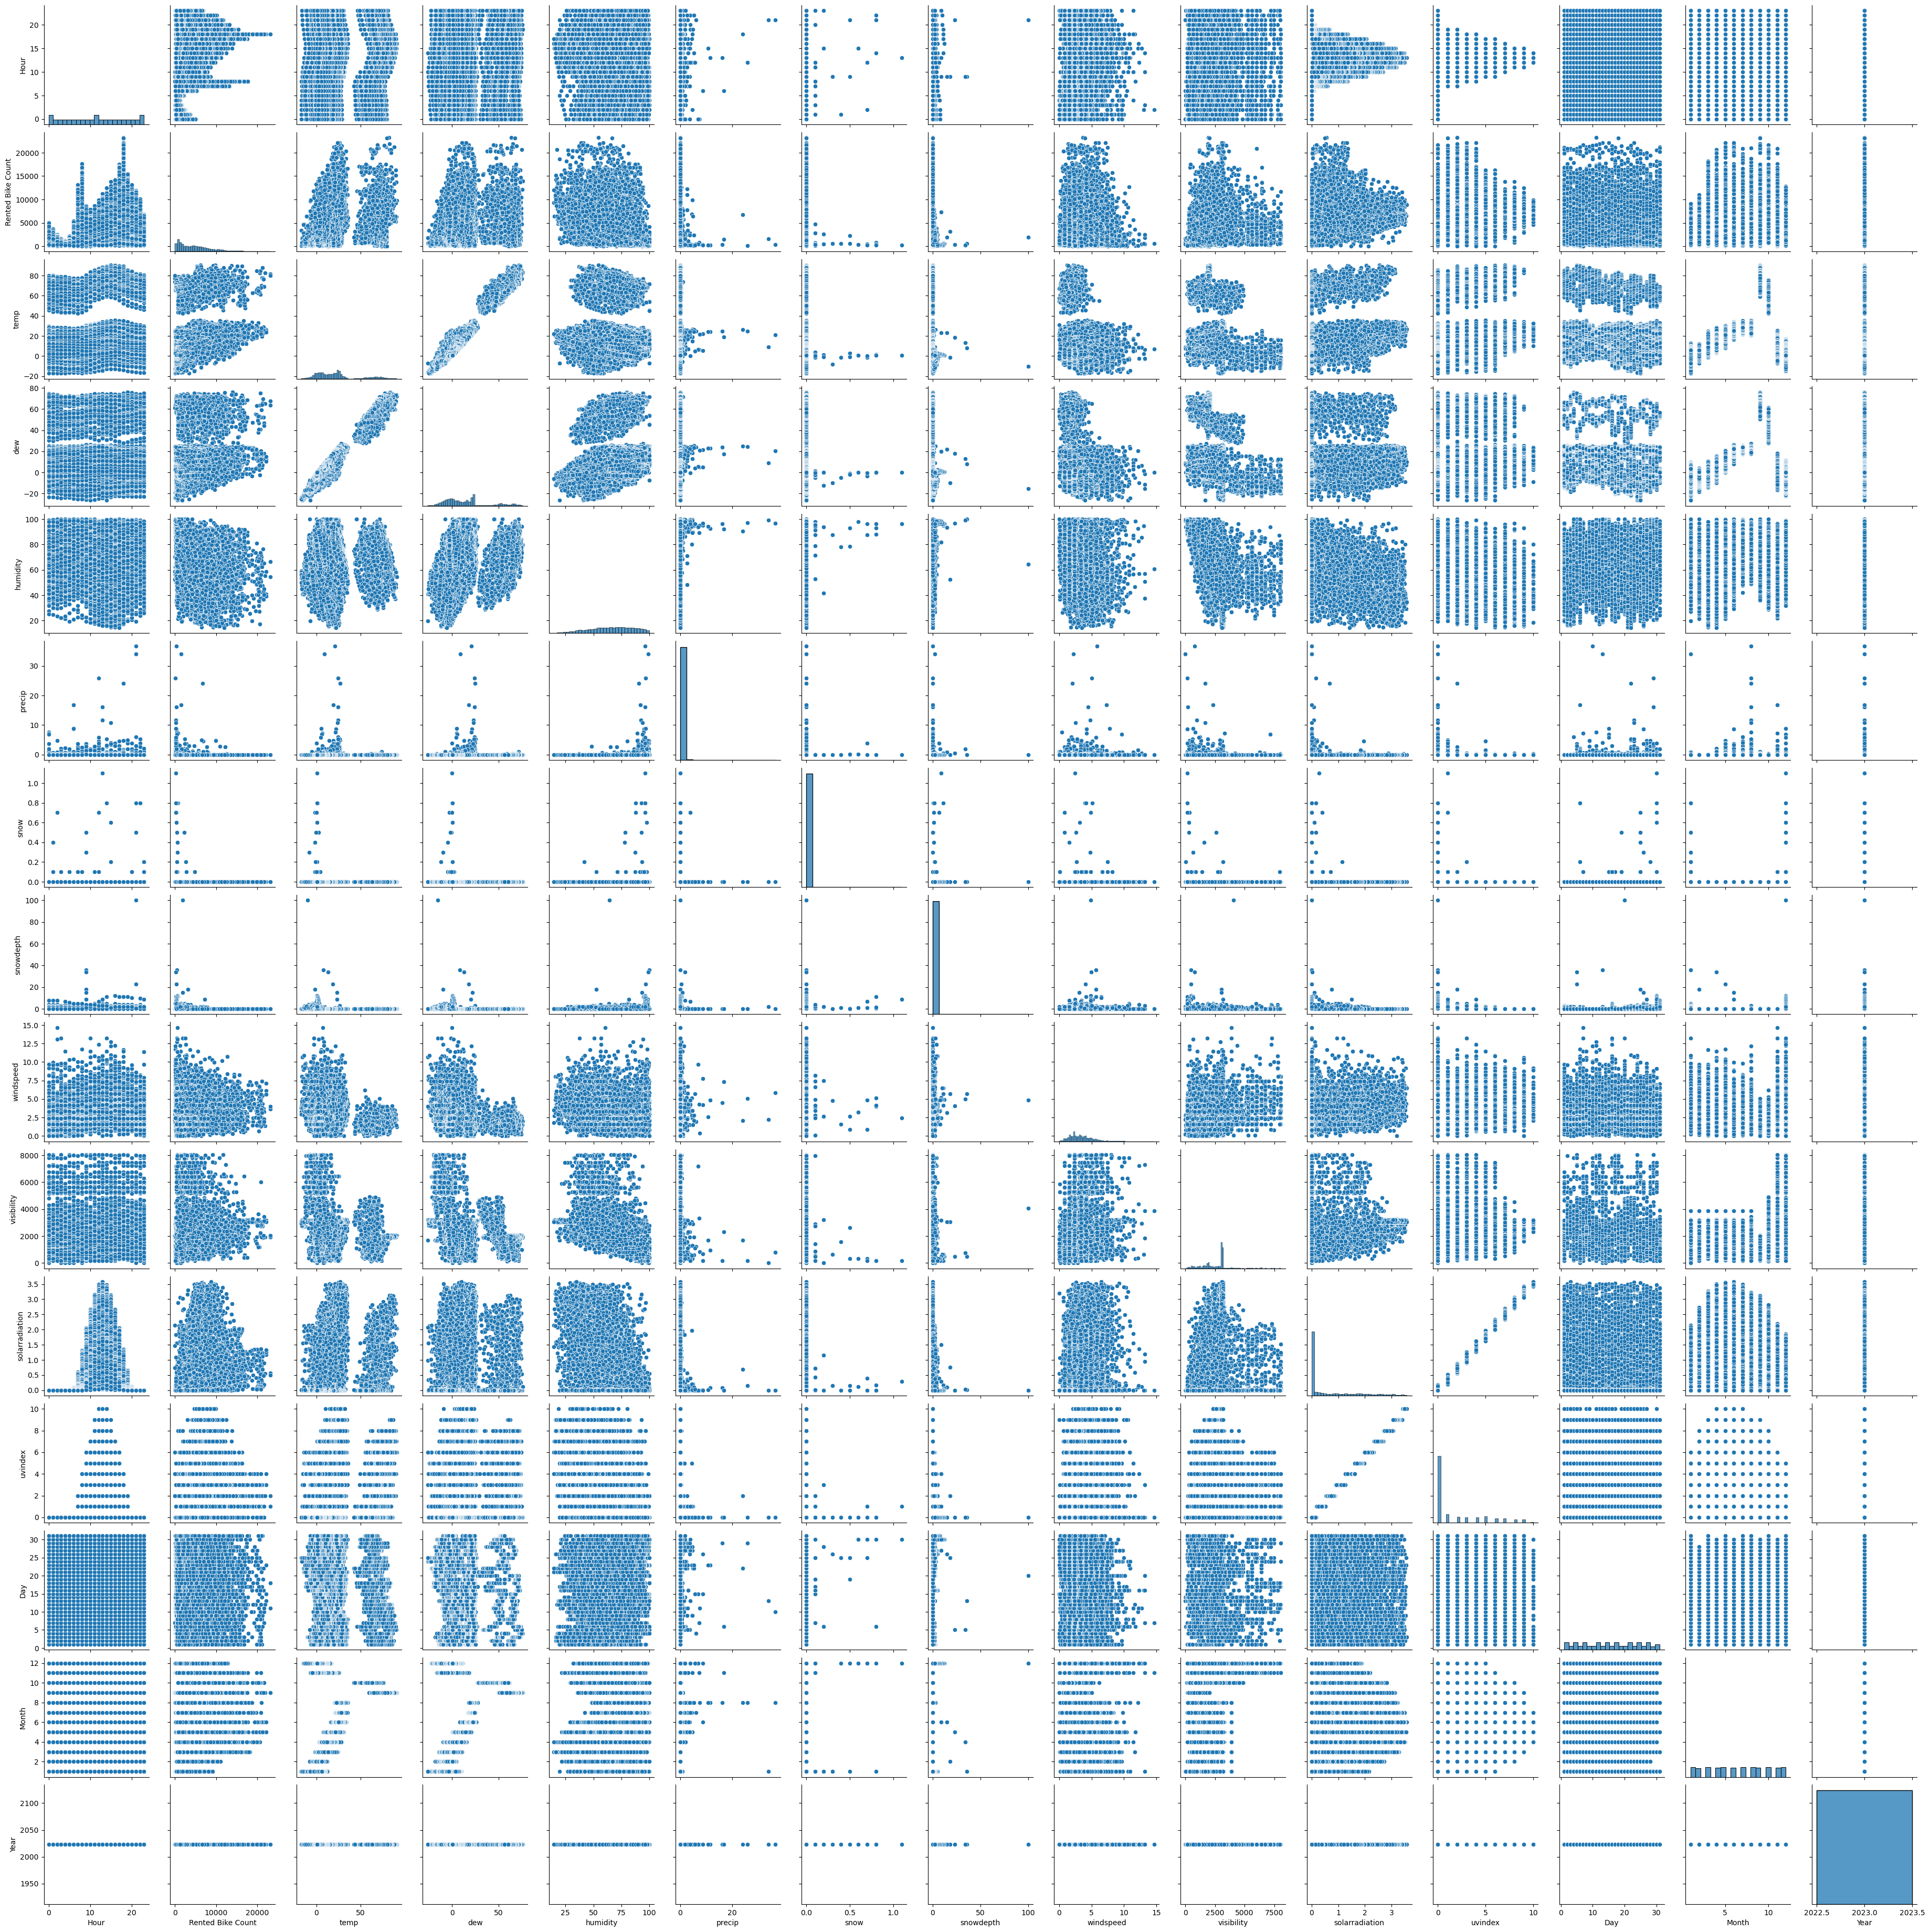

In [16]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

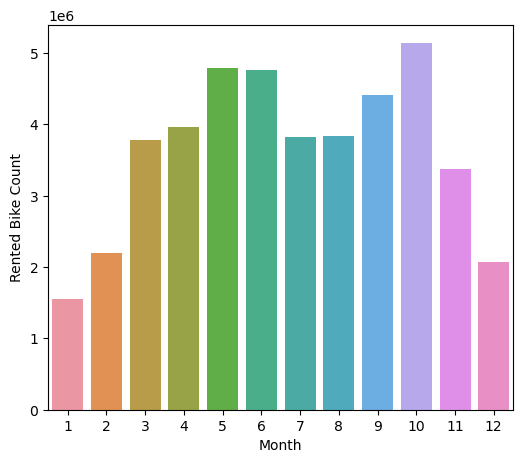

In [17]:
plt.figure(figsize=(6,5))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

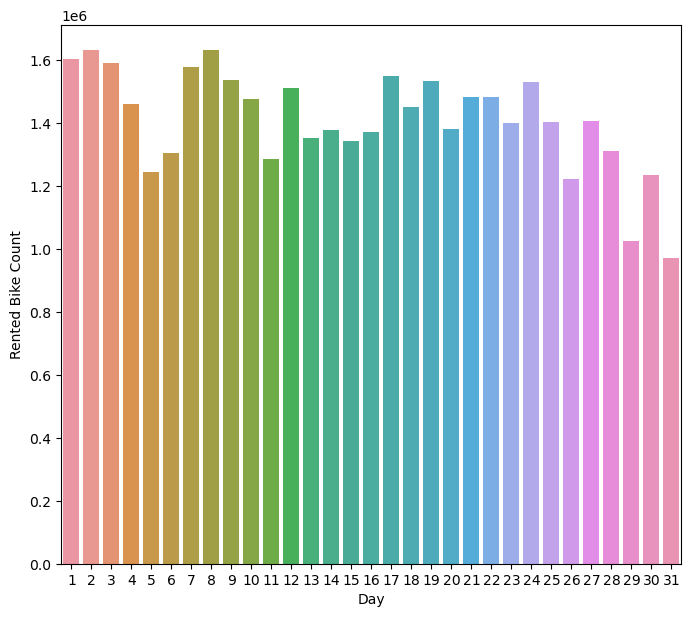

In [18]:
plt.figure(figsize=(8,7))
Month = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

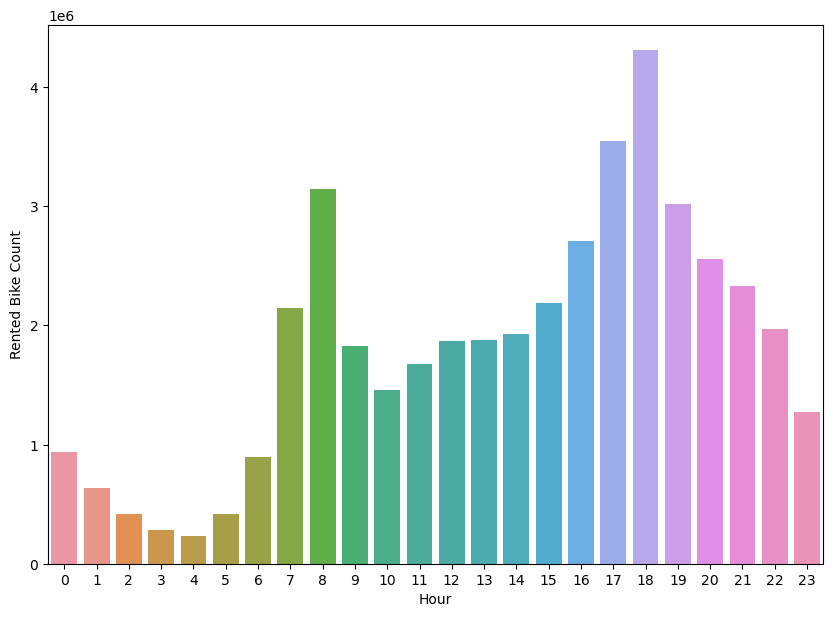

In [19]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)

<Axes: xlabel='precip', ylabel='Rented Bike Count'>

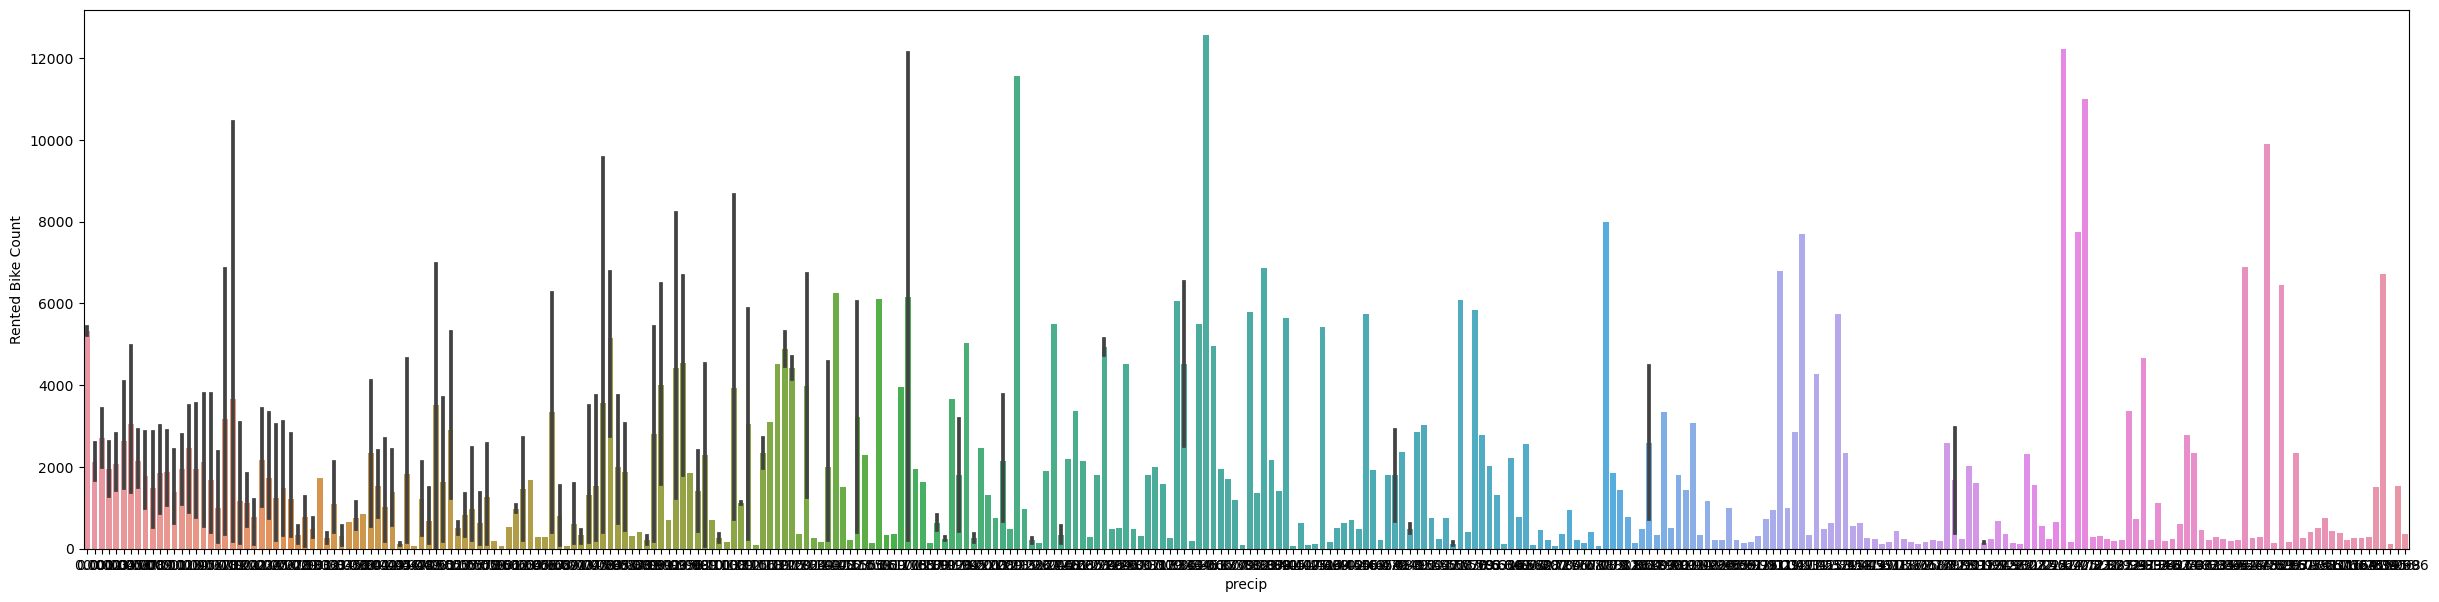

In [20]:
plt.figure(figsize=(30,7))
sns.barplot(x="precip", y="Rented Bike Count", data=df)

<Axes: xlabel='snow', ylabel='Rented Bike Count'>

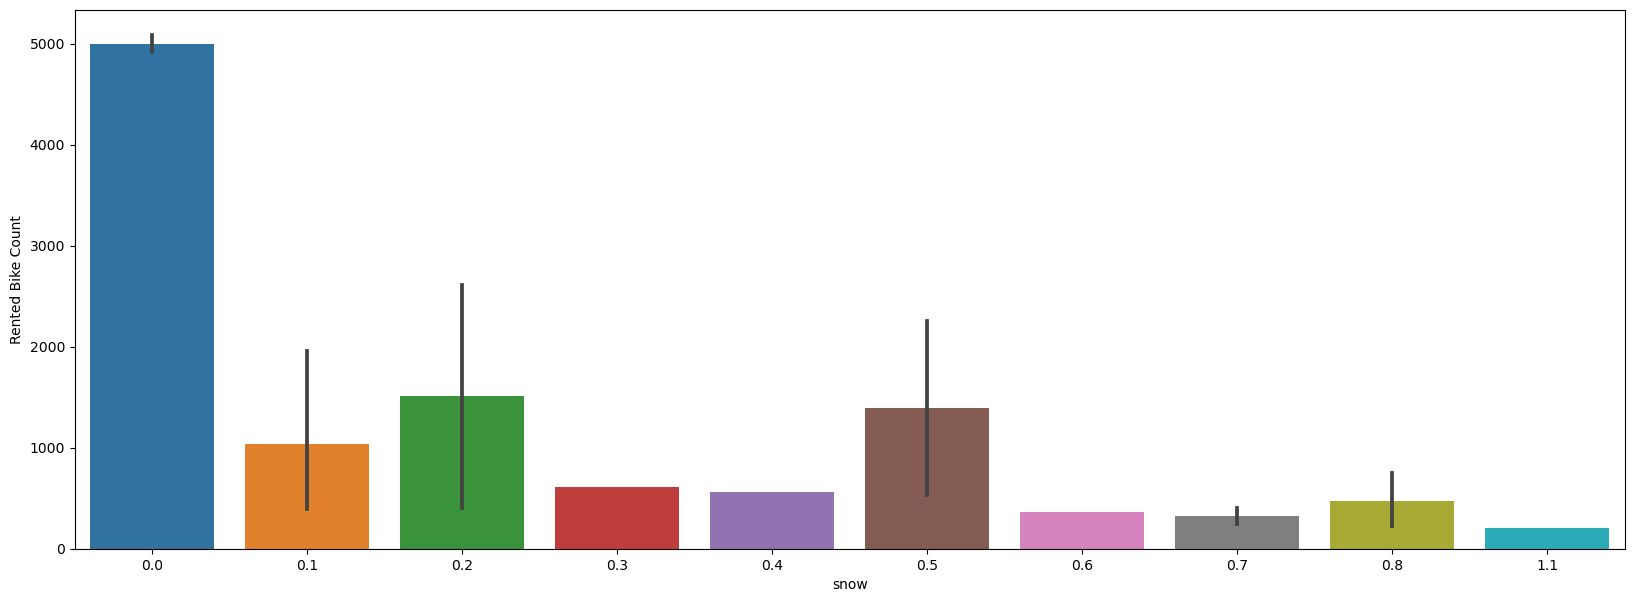

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(x="snow", y="Rented Bike Count", data=df)

/Users/tusharsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 4000x700 with 0 Axes>

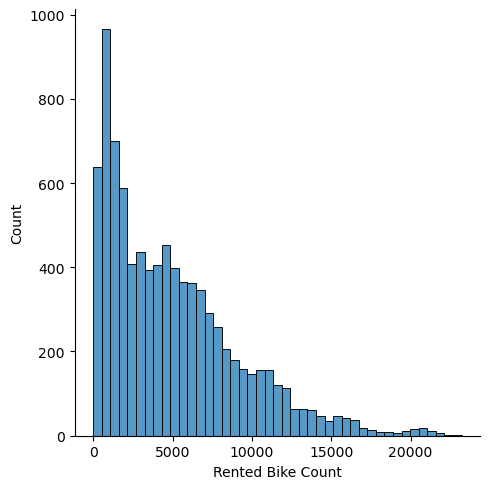

In [22]:
plt.figure(figsize=(40,7))
sns.displot(df["Rented Bike Count"])

/Users/tusharsingh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


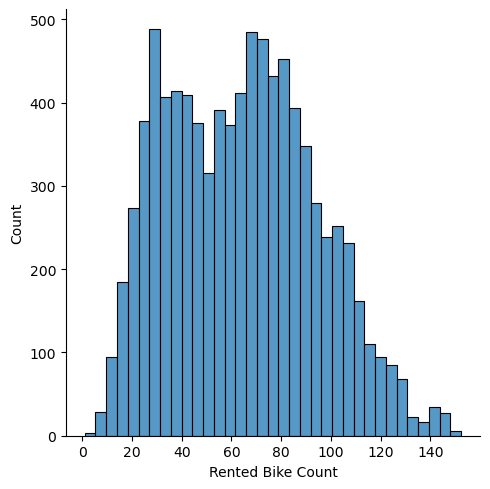

In [23]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

## Skewed Data

In [24]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the skewness of numerical columns and sort the values
skewness = numerical_cols.skew().sort_values(ascending=True)

# Display the sorted skewness values
print(skewness)

humidity             -0.295798
Month                -0.010458
Hour                  0.000000
Year                  0.000000
Day                   0.007522
dew                   0.943325
windspeed             0.989278
visibility            1.018211
temp                  1.113200
Rented Bike Count     1.145060
uvindex               1.337539
solarradiation        1.341474
snow                 30.730080
precip               31.023207
snowdepth            49.591791
dtype: float64


In [25]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to relevant columns
def apply_boxcox(column):
    # Add a small constant to avoid issues with zero or negative values
    column_transformed, _ = boxcox(column + 1)
    return column_transformed

columns_to_transform = ['visibility', 'solarradiation', 'uvindex', 'Rented Bike Count', 'snowdepth', 'snow', 'precip']

for col in columns_to_transform:
    df[col], _ = boxcox(df[col] + 1)

In [26]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the skewness of numerical columns and sort the values
skewness = numerical_cols.skew().sort_values(ascending=True)

# Display the sorted skewness values
print(skewness)

humidity             -0.295798
Rented Bike Count    -0.091169
Month                -0.010458
Hour                  0.000000
Year                  0.000000
Day                   0.007522
visibility            0.081161
uvindex               0.500269
solarradiation        0.556045
dew                   0.943325
windspeed             0.989278
temp                  1.113200
snowdepth             3.697772
precip                3.831301
snow                 19.029628
dtype: float64


## Remove Multicollinearity

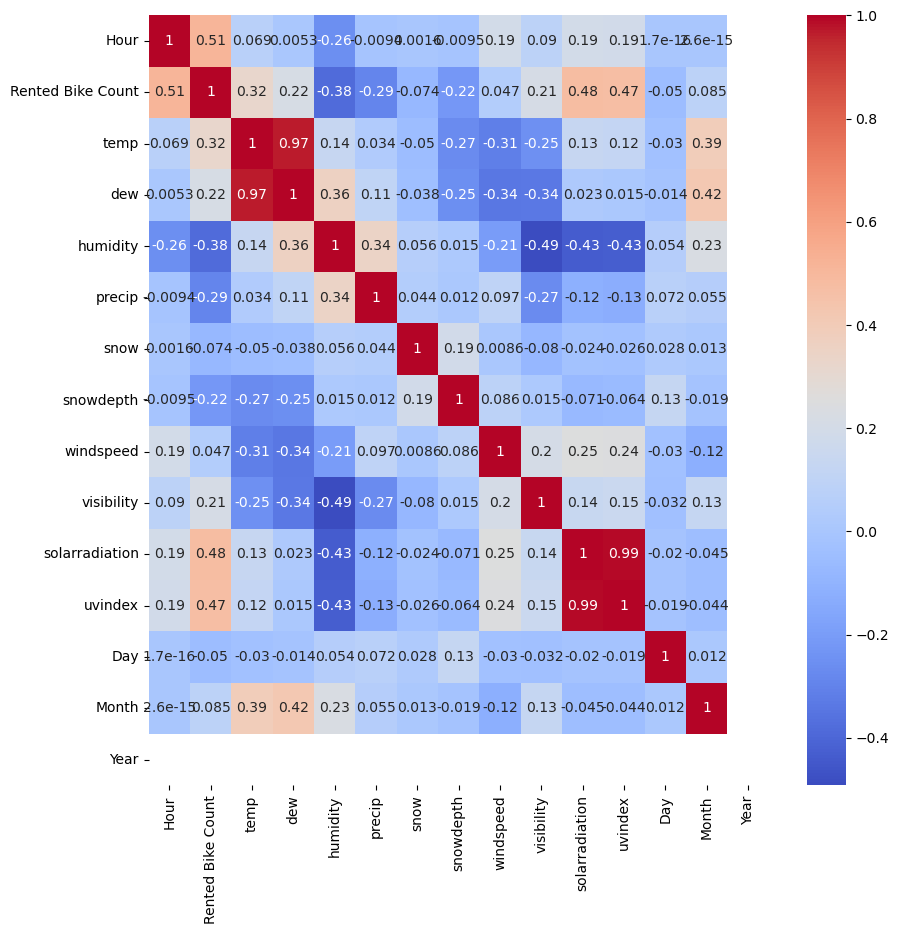

In [27]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [28]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [ variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

In [29]:
not_for_vif = [ "Day","Month","Year", "Rented Bike Count"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0             Hour   4.154832
1             temp  67.395796
2              dew  58.081721
3         humidity  11.006659
4           precip   1.288334
5             snow   1.049461
6        snowdepth   1.196575
7        windspeed   5.920401
8       visibility  12.621944
9   solarradiation  87.438082
10         uvindex  83.828551

In [1]:
not_for_vif = [ "Day", "Month", "Year", "Rented Bike Count","solarradiation","dew","humidity","visibility"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

NameError: name 'get_vif' is not defined

In [33]:
df.drop(["solarradiation","dew","humidity","visibility"], axis=1, inplace=True)

## Encoding

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               8760 non-null   int64  
 1   Rented Bike Count  8760 non-null   float64
 2   temp               8760 non-null   float64
 3   precip             8760 non-null   float64
 4   snow               8760 non-null   float64
 5   snowdepth          8760 non-null   float64
 6   windspeed          8760 non-null   float64
 7   uvindex            8760 non-null   float64
 8   Weekday            8760 non-null   object 
 9   weekday            8760 non-null   object 
 10  Day                8760 non-null   int32  
 11  Month              8760 non-null   int32  
 12  Year               8760 non-null   int32  
dtypes: float64(7), int32(3), int64(1), object(2)
memory usage: 787.2+ KB


In [35]:
# Assuming df is your DataFrame and 'column_to_drop' is the column you want to drop
df.drop(columns=['Weekday'], inplace=True)
df.head()


Hour  Rented Bike Count  temp  precip  snow  snowdepth  windspeed  uvindex  \
0     0          27.583415   0.9     0.0   0.0   0.058007   2.324608      0.0   
1     1          28.168768   1.4     0.0   0.0   0.058007   3.039872      0.0   
2     2          24.686900   1.5     0.0   0.0   0.058007   3.039872      0.0   
3     3          22.076987   1.7     0.0   0.0   0.058007   2.503424      0.0   
4     4          20.298609   1.5     0.0   0.0   0.058007   2.279904      0.0   

  weekday  Day  Month  Year  
0  Sunday    1      1  2023  
1  Sunday    1      1  2023  
2  Sunday    1      1  2023  
3  Sunday    1      1  2023  
4  Sunday    1      1  2023

In [36]:
cat_features = ["weekday"]

In [37]:
df["weekday"].value_counts()

weekday
Sunday       1272
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Friday       1248
Saturday     1248
Name: count, dtype: int64

In [38]:
df_weekday = pd.get_dummies(df["weekday"], drop_first = True)

In [39]:
df_weekday.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0   False     False    True     False    False      False
1   False     False    True     False    False      False
2   False     False    True     False    False      False
3   False     False    True     False    False      False
4   False     False    True     False    False      False

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               8760 non-null   int64  
 1   Rented Bike Count  8760 non-null   float64
 2   temp               8760 non-null   float64
 3   precip             8760 non-null   float64
 4   snow               8760 non-null   float64
 5   snowdepth          8760 non-null   float64
 6   windspeed          8760 non-null   float64
 7   uvindex            8760 non-null   float64
 8   weekday            8760 non-null   object 
 9   Day                8760 non-null   int32  
 10  Month              8760 non-null   int32  
 11  Year               8760 non-null   int32  
dtypes: float64(7), int32(3), int64(1), object(1)
memory usage: 718.7+ KB


In [41]:
df = pd.concat([df,df_weekday], axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               8760 non-null   int64  
 1   Rented Bike Count  8760 non-null   float64
 2   temp               8760 non-null   float64
 3   precip             8760 non-null   float64
 4   snow               8760 non-null   float64
 5   snowdepth          8760 non-null   float64
 6   windspeed          8760 non-null   float64
 7   uvindex            8760 non-null   float64
 8   weekday            8760 non-null   object 
 9   Day                8760 non-null   int32  
 10  Month              8760 non-null   int32  
 11  Year               8760 non-null   int32  
 12  Monday             8760 non-null   bool   
 13  Saturday           8760 non-null   bool   
 14  Sunday             8760 non-null   bool   
 15  Thursday           8760 non-null   bool   
 16  Tuesday            8760 

In [43]:
df.drop(["weekday"], axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               8760 non-null   int64  
 1   Rented Bike Count  8760 non-null   float64
 2   temp               8760 non-null   float64
 3   precip             8760 non-null   float64
 4   snow               8760 non-null   float64
 5   snowdepth          8760 non-null   float64
 6   windspeed          8760 non-null   float64
 7   uvindex            8760 non-null   float64
 8   Day                8760 non-null   int32  
 9   Month              8760 non-null   int32  
 10  Year               8760 non-null   int32  
 11  Monday             8760 non-null   bool   
 12  Saturday           8760 non-null   bool   
 13  Sunday             8760 non-null   bool   
 14  Thursday           8760 non-null   bool   
 15  Tuesday            8760 non-null   bool   
 16  Wednesday          8760 

In [45]:
df.head()

Hour  Rented Bike Count  temp  precip  snow  snowdepth  windspeed  uvindex  \
0     0          27.583415   0.9     0.0   0.0   0.058007   2.324608      0.0   
1     1          28.168768   1.4     0.0   0.0   0.058007   3.039872      0.0   
2     2          24.686900   1.5     0.0   0.0   0.058007   3.039872      0.0   
3     3          22.076987   1.7     0.0   0.0   0.058007   2.503424      0.0   
4     4          20.298609   1.5     0.0   0.0   0.058007   2.279904      0.0   

   Day  Month  Year  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0    1      1  2023   False     False    True     False    False      False  
1    1      1  2023   False     False    True     False    False      False  
2    1      1  2023   False     False    True     False    False      False  
3    1      1  2023   False     False    True     False    False      False  
4    1      1  2023   False     False    True     False    False      False

In [46]:
# List of boolean columns
boolean_columns = ['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday']
# Convert boolean columns to uint8 (0 and 1)
df[boolean_columns] = df[boolean_columns].astype('uint8')

# Now df[boolean_columns] will have values 0 and 1 as uint8 data type


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               8760 non-null   int64  
 1   Rented Bike Count  8760 non-null   float64
 2   temp               8760 non-null   float64
 3   precip             8760 non-null   float64
 4   snow               8760 non-null   float64
 5   snowdepth          8760 non-null   float64
 6   windspeed          8760 non-null   float64
 7   uvindex            8760 non-null   float64
 8   Day                8760 non-null   int32  
 9   Month              8760 non-null   int32  
 10  Year               8760 non-null   int32  
 11  Monday             8760 non-null   uint8  
 12  Saturday           8760 non-null   uint8  
 13  Sunday             8760 non-null   uint8  
 14  Thursday           8760 non-null   uint8  
 15  Tuesday            8760 non-null   uint8  
 16  Wednesday          8760 

In [48]:
df.head()

Hour  Rented Bike Count  temp  precip  snow  snowdepth  windspeed  uvindex  \
0     0          27.583415   0.9     0.0   0.0   0.058007   2.324608      0.0   
1     1          28.168768   1.4     0.0   0.0   0.058007   3.039872      0.0   
2     2          24.686900   1.5     0.0   0.0   0.058007   3.039872      0.0   
3     3          22.076987   1.7     0.0   0.0   0.058007   2.503424      0.0   
4     4          20.298609   1.5     0.0   0.0   0.058007   2.279904      0.0   

   Day  Month  Year  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0    1      1  2023       0         0       1         0        0          0  
1    1      1  2023       0         0       1         0        0          0  
2    1      1  2023       0         0       1         0        0          0  
3    1      1  2023       0         0       1         0        0          0  
4    1      1  2023       0         0       1         0        0          0

In [49]:
df.shape

(8760, 17)

## Split Data for Training and Testing

In [50]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7008, 16)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 16)
Shape of y_test :  (1752,)


## Scaling

In [51]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train[:2]

array([[ 1.51118219, -0.21498365, -0.27431388, -0.05213979, -0.25276058,
        -0.44052724, -0.81807726, -0.3077768 , -0.43716168,  0.        ,
        -0.40916536,  2.46842407, -0.41508846, -0.40081071, -0.4075004 ,
        -0.40630934],
       [ 0.93371229,  0.12566171,  4.38173993, -0.05213979, -0.25276058,
        -1.29762439,  0.46814153, -0.3077768 ,  0.14285139,  0.        ,
        -0.40916536, -0.40511677, -0.41508846,  2.49494334, -0.4075004 ,
        -0.40630934]])

In [53]:
sc.mean_

array([1.15323916e+01, 2.21857449e+01, 1.54725677e-03, 2.12295218e-06,
       3.42595379e-03, 3.39701920e+00, 3.23770652e-01, 1.57019121e+01,
       6.50742009e+00, 2.02300000e+03, 1.43407534e-01, 1.40981735e-01,
       1.46974886e-01, 1.38413242e-01, 1.42408676e-01, 1.41695205e-01])

In [54]:
sc.scale_

array([6.92676802e+00, 2.31912748e+01, 5.64046111e-03, 4.07165462e-05,
       1.35541462e-02, 1.82551070e+00, 3.95770265e-01, 8.77880365e+00,
       3.44819815e+00, 1.00000000e+00, 3.50487965e-01, 3.48002709e-01,
       3.54080879e-01, 3.45333196e-01, 3.49468804e-01, 3.48737257e-01])

# Training ML Models

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(X_test)
y_pred

array([44.67917053, 18.14084229, 48.10335924, ..., 27.54561917,
       29.01085642, 37.91695198])

## Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} : ['MSE': {round(MSE,3)}, 'RMSE':{round(RMSE,3)}, 'MAE' :{round(MAE,3)}, 'R2':{round(R2,3)}]")

In [59]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE': 63.222, 'RMSE':7.951, 'MAE' :6.225, 'R2':0.563]


## Train Multiple Models

In [60]:
!pip install xgboost


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [61]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [62]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [63]:
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNNR")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

Ridge : ['MSE': 63.222, 'RMSE':7.951, 'MAE' :6.225, 'R2':0.563]
Lasso : ['MSE': 68.823, 'RMSE':8.296, 'MAE' :6.477, 'R2':0.524]
PolynomialFeatures : ['MSE': 53.545, 'RMSE':7.317, 'MAE' :5.431, 'R2':0.63]
SVR : ['MSE': 51.445, 'RMSE':7.172, 'MAE' :5.315, 'R2':0.644]
KNNR : ['MSE': 43.043, 'RMSE':6.561, 'MAE' :4.708, 'R2':0.702]
DecisionTreeRegressor : ['MSE': 25.522, 'RMSE':5.052, 'MAE' :2.681, 'R2':0.823]
RandomForestRegressor : ['MSE': 12.402, 'RMSE':3.522, 'MAE' :2.071, 'R2':0.914]
XGBRegressor : ['MSE': 9.316, 'RMSE':3.052, 'MAE' :1.804, 'R2':0.936]
